## JUICE JUNCTION BUISNESS OPTIMIZATION

Objectives:

1)Identify best-selling items and high-revenue periods.

2)Analyze payment behavior (cash vs. digital).

3)Track inventory to reduce wastage.

4)Suggest marketing strategies for off-peak months.

#Importing Libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Loading Datasets

In [2]:
df = pd.read_csv("C:/Users/chari/OneDrive/Desktop/MY WORK/Juice-Junction-Buisness/Juice_Junction_buisness_sales.csv")
df

,Order Date,Category,Item,Product_ID,Quantity,Price,Total Sales,Customer_ID,Payment_Type,Inventory_Stock
0,"Monday, 21 August 2023",Chats,Bhel Puri,P006,4,75,300,C4766,Wallet,91
1,"Sunday, 4 August 2024",Fresh Juice,Mango Juice,P010,4,90,360,C5224,Cash,30
2,"Tuesday, 20 February 2024",Chats,Masala Puri,P007,4,137,548,C5858,Card,35
3,"Thursday, 25 April 2024",Shakes,Chocolate Shake,P013,3,88,264,C9902,Wallet,47
4,"Friday, 10 November 2023",Ice Cream,Strawberry Ice Cream,P020,5,143,715,C4825,Wallet,8
...,...,...,...,...,...,...,...,...,...,...
6995,"Wednesday, 26 July 2023",Snacks,Sandwich,P002,1,81,81,C7127,Wallet,23
6996,"Friday, 17 February 2023",Chats,Pani Puri,P005,2,109,218,C9028,Card,28
6997,"Tuesday, 23 May 2023",Shakes,Mango Shake,P015,4,132,528,C9295,Card,95
6998,"Friday, 22 December 2023",Ice Cream,Vanilla Ice Cream,P018,5,107,535,C9304,Cash,68


#Overview of my dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Order Date       7000 non-null   object
 1   Category         7000 non-null   object
 2   Item             7000 non-null   object
 3   Product_ID       7000 non-null   object
 4   Quantity         7000 non-null   int64 
 5   Price            7000 non-null   int64 
 6    Total Sales     7000 non-null   int64 
 7   Customer_ID      7000 non-null   object
 8   Payment_Type     7000 non-null   object
 9   Inventory_Stock  7000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 547.0+ KB


In [4]:
print(df.isnull().sum())

Order Date         0
Category           0
Item               0
Product_ID         0
Quantity           0
Price              0
 Total Sales       0
Customer_ID        0
Payment_Type       0
Inventory_Stock    0
dtype: int64


No Null values in my dataset

#Data Clean up

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [6]:
df

,Order Date,Category,Item,Product_ID,Quantity,Price,Total Sales,Customer_ID,Payment_Type,Inventory_Stock
0,2023-08-21,Chats,Bhel Puri,P006,4,75,300,C4766,Wallet,91
1,2024-08-04,Fresh Juice,Mango Juice,P010,4,90,360,C5224,Cash,30
2,2024-02-20,Chats,Masala Puri,P007,4,137,548,C5858,Card,35
3,2024-04-25,Shakes,Chocolate Shake,P013,3,88,264,C9902,Wallet,47
4,2023-11-10,Ice Cream,Strawberry Ice Cream,P020,5,143,715,C4825,Wallet,8
...,...,...,...,...,...,...,...,...,...,...
6995,2023-07-26,Snacks,Sandwich,P002,1,81,81,C7127,Wallet,23
6996,2023-02-17,Chats,Pani Puri,P005,2,109,218,C9028,Card,28
6997,2023-05-23,Shakes,Mango Shake,P015,4,132,528,C9295,Card,95
6998,2023-12-22,Ice Cream,Vanilla Ice Cream,P018,5,107,535,C9304,Cash,68


In [7]:
df_DA = df

In [8]:
df_DA['Order_Month'] = df_DA['Order Date'].dt.strftime('%b')
df_DA['Order_Year'] = df_DA['Order Date'].dt.year
df_DA['Order_Day'] = df_DA['Order Date'].dt.day_name()
df_DA

,Order Date,Category,Item,Product_ID,Quantity,Price,Total Sales,Customer_ID,Payment_Type,Inventory_Stock,Order_Month,Order_Year,Order_Day
0,2023-08-21,Chats,Bhel Puri,P006,4,75,300,C4766,Wallet,91,Aug,2023,Monday
1,2024-08-04,Fresh Juice,Mango Juice,P010,4,90,360,C5224,Cash,30,Aug,2024,Sunday
2,2024-02-20,Chats,Masala Puri,P007,4,137,548,C5858,Card,35,Feb,2024,Tuesday
3,2024-04-25,Shakes,Chocolate Shake,P013,3,88,264,C9902,Wallet,47,Apr,2024,Thursday
4,2023-11-10,Ice Cream,Strawberry Ice Cream,P020,5,143,715,C4825,Wallet,8,Nov,2023,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2023-07-26,Snacks,Sandwich,P002,1,81,81,C7127,Wallet,23,Jul,2023,Wednesday
6996,2023-02-17,Chats,Pani Puri,P005,2,109,218,C9028,Card,28,Feb,2023,Friday
6997,2023-05-23,Shakes,Mango Shake,P015,4,132,528,C9295,Card,95,May,2023,Tuesday
6998,2023-12-22,Ice Cream,Vanilla Ice Cream,P018,5,107,535,C9304,Cash,68,Dec,2023,Friday


#Univariate Analysis

1)Count of Category

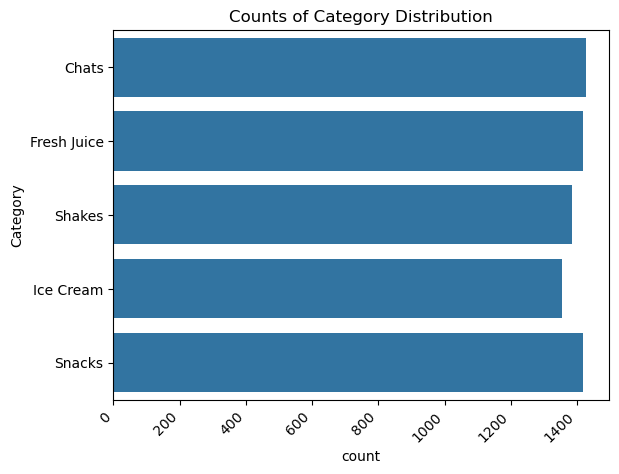

In [9]:
sns.countplot(df_DA['Category'])
plt.title("Counts of Category Distribution")
plt.xticks(rotation= 45, ha= 'right')
plt.show()

2)Payment Method Usage

C:\Users\chari\AppData\Local\Temp\ipykernel_1808\2227226545.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df_DA, x= 'Payment_Type', palette= 'Set2')


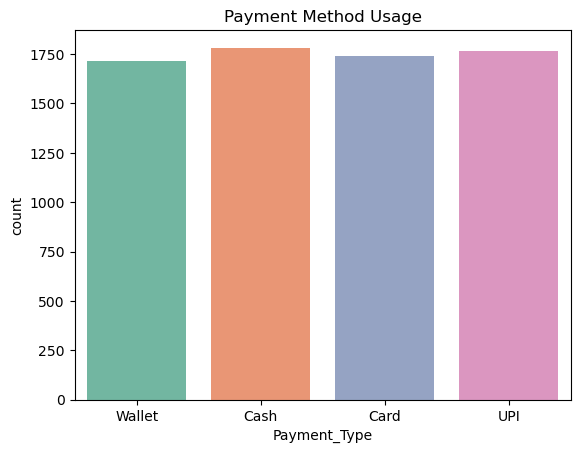

In [10]:
sns.countplot(data= df_DA, x= 'Payment_Type', palette= 'Set2')
plt.title("Payment Method Usage")
plt.show()

3)Sales Distribution

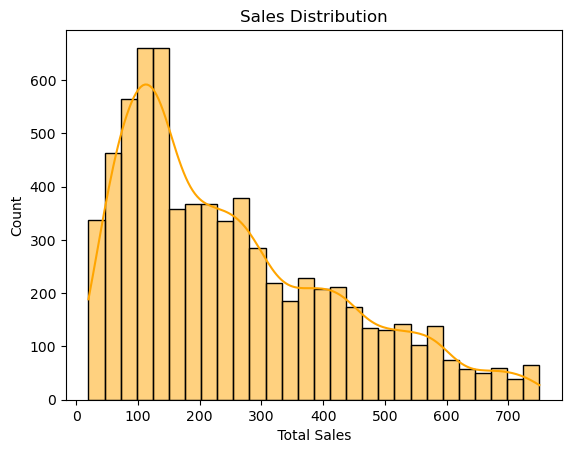

In [11]:
sns.histplot(df_DA[' Total Sales '], kde=True, color= 'Orange')
plt.title("Sales Distribution")
plt.show()

#Bivariate Analysis

1)Category and Sales 

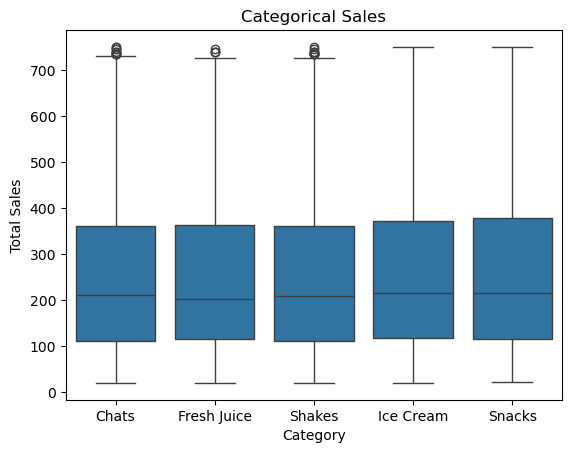

In [12]:
sns.boxplot(data= df_DA, x= 'Category',y= ' Total Sales ')
plt.title("Categorical Sales")
plt.show()

2)Quantity and Sales

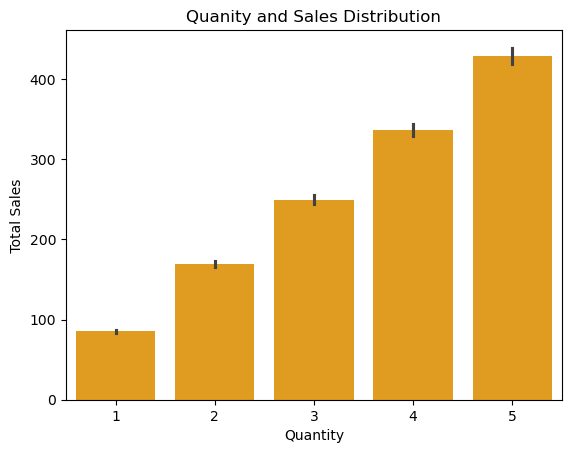

In [13]:
sns.barplot(data= df_DA, y= ' Total Sales ', x= 'Quantity', color= 'Orange')
plt.title("Quanity and Sales Distribution")
plt.show()